In [1]:
import os
import random

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import numpy as np
import pandas as pd
import tensorflow as tf


from utils import get_dataset

In [2]:
category_ind = {1: 'vehicle', 2: 'pedestrian', 3:'cyclist'}
class_color_ind = {1: '#FF0000', 2: '#0000FF', 4: '#00FF00'}

In [3]:
dataset = get_dataset("data/waymo/val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 15
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [4]:
dataset.element_spec

{'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 'source_id': TensorSpec(shape=(), dtype=tf.string, name=None),
 'key': TensorSpec(shape=(), dtype=tf.string, name=None),
 'filename': TensorSpec(shape=(), dtype=tf.string, name=None),
 'groundtruth_image_confidences': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'groundtruth_verified_neg_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'groundtruth_not_exhaustive_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'groundtruth_boxes': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None),
 'groundtruth_area': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'groundtruth_is_crowd': TensorSpec(shape=(None,), dtype=tf.bool, name=None),
 'groundtruth_difficult': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'groundtruth_group_of': TensorSpec(shape=(None,), dtype=tf.bool, name=None),
 'groundtruth_weights': TensorSpec(shape=(None,), dtype=tf.float32, name=Non

In [5]:
def display_instances(batch, label_category, label_color, numcols = 1):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # number of frames in a batch
    batch_size = max([idx for idx,_ in enumerate(batch)]) + 1 
    
    if batch_size % numcols:
        rows = batch_size // numcols + 1
    else:
        rows = batch_size // numcols
        
    fig,ax = plt.subplots(rows, numcols, figsize = (numcols*10, rows*10))
    
    for ind, batch_frame in enumerate(batch):
        image = batch_frame['image'].numpy()
        # get ground truth objejcts
        # format [ymin, xmin, ymax, xmax]
        bboxes = batch_frame['groundtruth_boxes'].numpy()
        # get ground truth classes
        labels = batch_frame['groundtruth_classes'].numpy()
        #resize normalized bounding boxes
        bboxes[:,[0,2]] *= image.shape[0]
        bboxes[:,[1,3]] *= image.shape[1]
    
        # arguments of curr plot
        row_ind = ind//numcols
        col_ind = ind%numcols
        
        ax[row_ind, col_ind].imshow(image)
        ax[row_ind, col_ind].axis('off')
        # display ground truth bounding boxes
        for bbox,label in zip(bboxes,labels):
            # coordinates of bounding box
            y1,x1,y2,x2 = bbox
            # get color mapping
            cl_color = class_color_ind[label]
            # add boxes
            rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor = cl_color)
            ax[row_ind, col_ind].add_patch(rec)
    
    plt.tight_layout()
    plt.show()
    """"
    image = batch['image'].numpy().astype("uint8")
    
    ax[x,y].imshow(image)
    
    bboxes = batch['groundtruth_boxes'].numpy()
    labels = batch['groundtruth_classes'].numpy()
    
    for bbox,label in zip(bboxes, labels):
        y1, x1, y2, x2 = bbox
        # convert normalized positions to 640x640
        y1 = y1*640
        x1 = x1*640
        y2 = y2*640
        x2 = x2*640
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor = colormap[label])
        ax[x,y].add_patch(rec)
    
    ax[x,y].axis("off")
    """
    # ADD CODE HERE

In [9]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

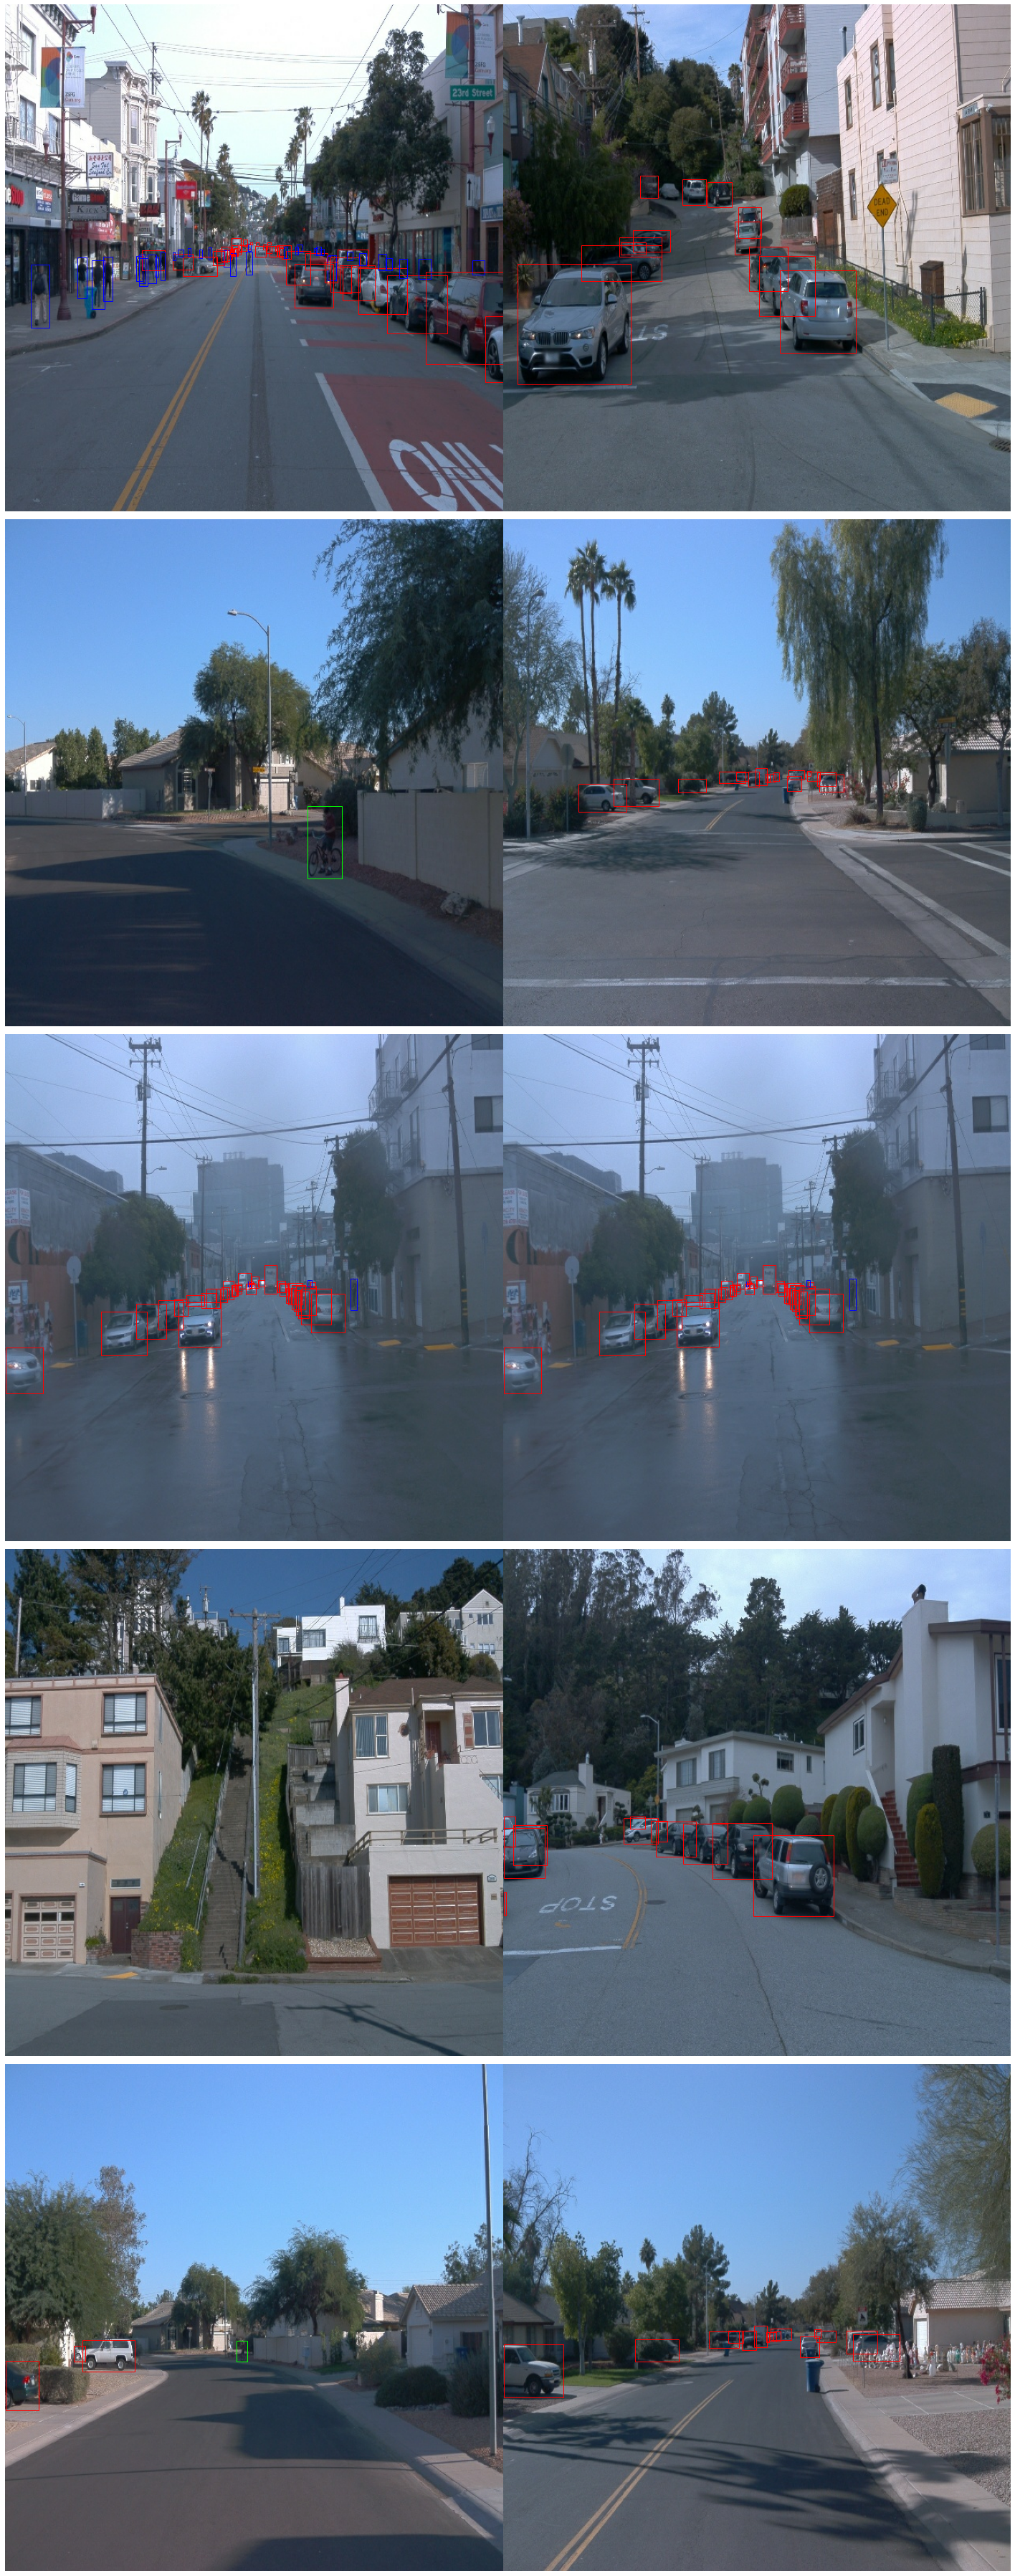

In [12]:
## display 10 random images
batch = dataset.shuffle(15).take(10)
display_instances(batch, category_ind, class_color_ind, 2)